In [ ]:
!git clone https://github.com/ianepreston/stats_can

In [29]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Exploring Python api for Statistics Canada New Data Model (NDM)</h1>

<h4 align='center'>Laura Gutierrez Funderburk $\mid$ November 1 2018</h4>

<h2 align='center'>Abstract</h2>

In this notebook we explore functionality of the Python API for Statistics Canada developed by Ian Preston 
https://anaconda.org/ian.e.preston/stats_can

<h2 align='center'>About Statistics Canada</h2>

Statistics Canada is the national statistical office. The agency ensures Canadians have the key information on Canada's economy, society and environment that they require to function effectively as citizens and decision makers. 


![Stats Canada Main Page](./StatsCanada.png)

URL: https://www.statcan.gc.ca/eng/start

<h2 align='center'>About the Stats Can Python Library</h2>

The Stats_Can library retrieves up-to-date data from the Statistics Canada API, making it a powerful tool to explore statistics on Canada. 

<h2 align='center'>Exploring the Stats Can Python Library using Jupyter Notebooks</h2>

We can explore the database from two different angles:

<h4>Retrieve the latest lists series:</h4> This option will return a comprehensive list of all tables pointing to different datasets.

<h4>Retrieve a particular dataset:</h4> This option will give access to metadata and data pertaining a particular dataset. 

<h2 align='center'>Retrieve latest list series</h2>

In this section we will explore the last 25 updated datasets. We will use the Python Library Stats Can to get that data, without navigating the entire Stats Canada Database. 

In [1]:
### import stats_can
import datetime as dt
import pandas as pd
import matplotlib as plt
import stats_can
import json
from pprint import pprint

In [2]:
#%run -i ./stats_can/scwds.py
#%run -i ./stats_can/sc.py

In [ ]:
changed_series = stats_can.get_changed_series_list()
changed_series_df = pd.DataFrame.from_dict(changed_series)
short_series_list = changed_series_df.head(n=25)

In [ ]:
short_series_list

<h2 align='center'>Retrieve a particular dataset</h2>


We can use the values under the productId column to retrieve what is known as "cube" or "table" metadata. Metadata act as pointers to the actual data, and provide sufficient information to understand the type of study, without diving into the details. This is useful, as some of the data within Stats Canada is large. 

Metadata can be called from the Statistics Canada Database - information is obtained in the form of a JSON file which can be formatted for processing. 

Let us pick the first entry, with productId 33100036 and obtain metadata. 

In [ ]:
# Download first entry, at the time this notebook was written, the table selected had a ProductId 33100036 
stats_can.download_tables("33100036")
with open('33100036.json') as f:
    data = json.load(f)

In [ ]:
keys_names = [item for item in data.keys()]
for i in range(len(keys_names)-3):
    print(str(keys_names[i]) + ":\t"+ str(data[keys_names[i]]))

We then see that the above is a study that contains data on "Daily average foreign exchange rates in Canadian dollars, Bank of Canada" ("Taux de change moyens quotidiens en dollars canadiens, Banque du Canada") which was conducted between January 1, 1967 and September 1, 2018. 

We can download the data and explore it using Python's libraries Matplotlib and Pandas Dataframes. 

<h2 align='center'> Daily average foreign exchange rates in Canadian dollars, Bank of Canada - Taux de change moyens quotidiens en dollars canadiens, Banque du Canada
</h2>

<h3 align='center'> January 1, 1967 and September 1, 2018. </h3>

In [4]:
import zipfile

zf = zipfile.ZipFile('./33100036-eng.zip') 
df = pd.read_csv(zf.open('33100036.csv'))

In [35]:
df

,REF_DATE,GEO,DGUID,Type of currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-05-04,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,98.840697,NaN,NaN,t,8
1,1981-05-05,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,98.784083,NaN,NaN,t,8
2,1981-05-06,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,98.850753,NaN,NaN,t,8
3,1981-05-07,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,99.030187,NaN,NaN,t,8
4,1981-05-08,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,98.982241,NaN,NaN,t,8
5,1981-05-09,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,0.000000,NaN,NaN,t,8
6,1981-05-10,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,0.000000,NaN,NaN,t,8
7,1981-05-11,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,99.068240,NaN,NaN,t,8
8,1981-05-12,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,99.199516,NaN,NaN,t,8
9,1981-05-13,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,99.305652,NaN,NaN,t,8


<h2 align='center'> Canadian-Dollar Effective Exchange Rate Index (CERI)
</h2>

<h3 align='center'> January 1, 1998 October 31 2018 </h3>

In [12]:
import matplotlib.pyplot as plt

In [41]:
df_20 = df[(df['REF_DATE'] >= '1998-01-01') & (df['REF_DATE'] <= '2018-10-30')]

In [42]:
df_20

,REF_DATE,GEO,DGUID,Type of currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
6086,1998-01-01,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,86.780807,NaN,NaN,t,8
6087,1998-01-02,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,87.132704,NaN,NaN,t,8
6088,1998-01-03,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,0.000000,NaN,NaN,t,8
6089,1998-01-04,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,0.000000,NaN,NaN,t,8
6090,1998-01-05,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,87.160082,NaN,NaN,t,8
6091,1998-01-06,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,86.903440,NaN,NaN,t,8
6092,1998-01-07,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,86.897760,NaN,NaN,t,8
6093,1998-01-08,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,86.862409,NaN,NaN,t,8
6094,1998-01-09,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,87.162004,NaN,NaN,t,8
6095,1998-01-10,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,0.000000,NaN,NaN,t,8


In [43]:
df_20_CAN = df_20[(df_20["Type of currency"] == 'Canadian-Dollar Effective Exchange Rate Index (CERI)')]
df_20_CAN

,REF_DATE,GEO,DGUID,Type of currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
6086,1998-01-01,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,86.780807,NaN,NaN,t,8
6087,1998-01-02,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,87.132704,NaN,NaN,t,8
6088,1998-01-03,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,0.000000,NaN,NaN,t,8
6089,1998-01-04,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,0.000000,NaN,NaN,t,8
6090,1998-01-05,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,87.160082,NaN,NaN,t,8
6091,1998-01-06,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,86.903440,NaN,NaN,t,8
6092,1998-01-07,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,86.897760,NaN,NaN,t,8
6093,1998-01-08,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,86.862409,NaN,NaN,t,8
6094,1998-01-09,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,87.162004,NaN,NaN,t,8
6095,1998-01-10,Canada,2016A000011124,Canadian-Dollar Effective Exchange Rate Index ...,"Index, 1992=100",173,units,0,v111666250,1.27,0.000000,NaN,NaN,t,8


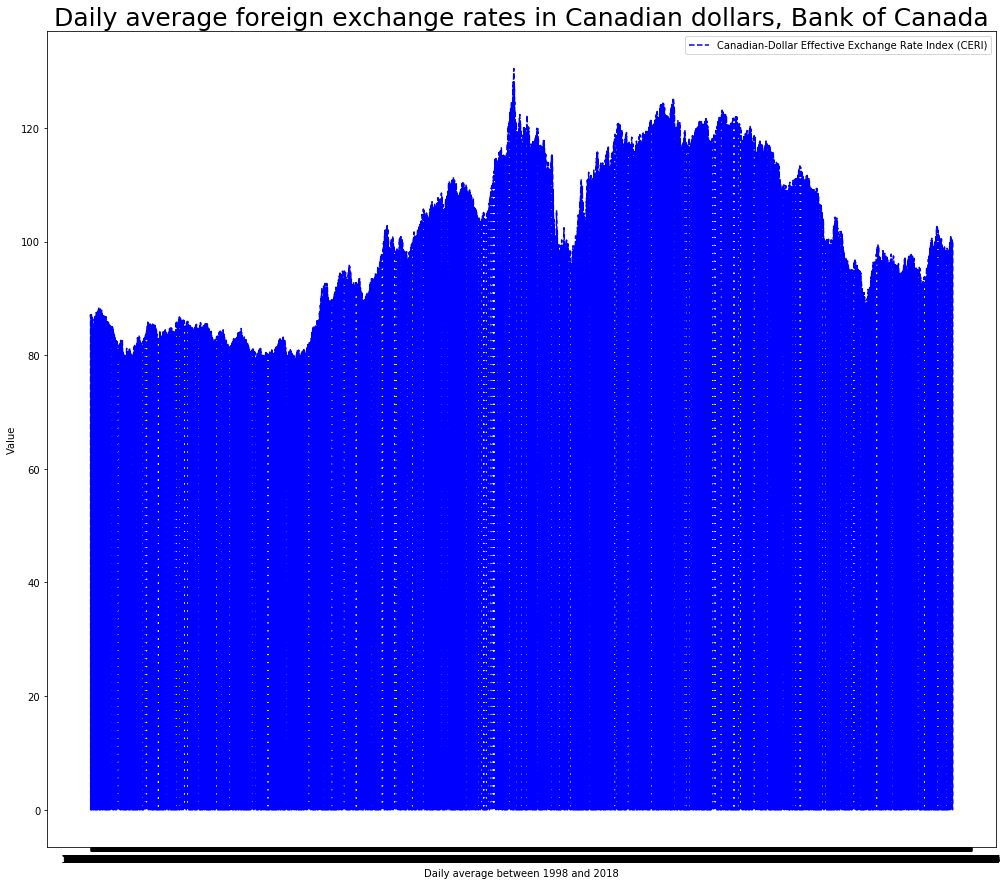

In [44]:
fig = plt.figure(facecolor='w',figsize=(17,15))
ax  = fig.add_subplot(111,facecolor = '#ffffff')

plt.plot(df_20_CAN["REF_DATE"],df_20_CAN["VALUE"],'b--',label='Canadian-Dollar Effective Exchange Rate Index (CERI)')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Daily average between 1998 and 2018')
plt.ylabel('Value')
plt.title('Daily average foreign exchange rates in Canadian dollars, Bank of Canada',fontsize=25)
legend = ax.legend()

plt.show()

<h2 align='center'> U.S. dollar, daily average'
</h2>

<h3 align='center'> January 1, 2017 October 31 2018 </h3>

In [37]:
currencies = set([item for item in df_20["Type of currency"]])
#currencies

In [39]:
df_20_USA = df_20[(df_20["Type of currency"] == 'U.S. dollar, daily average')]
df_20_USA

,REF_DATE,GEO,DGUID,Type of currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
13050,2017-01-01,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,NaN,..,NaN,NaN,4
13077,2017-01-02,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,NaN,..,NaN,NaN,4
13104,2017-01-03,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,1.3435,NaN,NaN,NaN,4
13131,2017-01-04,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,1.3315,NaN,NaN,NaN,4
13158,2017-01-05,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,1.3244,NaN,NaN,NaN,4
13185,2017-01-06,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,1.3214,NaN,NaN,NaN,4
13212,2017-01-07,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,0.0000,NaN,NaN,NaN,4
13239,2017-01-08,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,0.0000,NaN,NaN,NaN,4
13266,2017-01-09,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,1.3240,NaN,NaN,NaN,4
13293,2017-01-10,Canada,2016A000011124,"U.S. dollar, daily average",Dollars,81,units,0,v111666248,1.25,1.3213,NaN,NaN,NaN,4


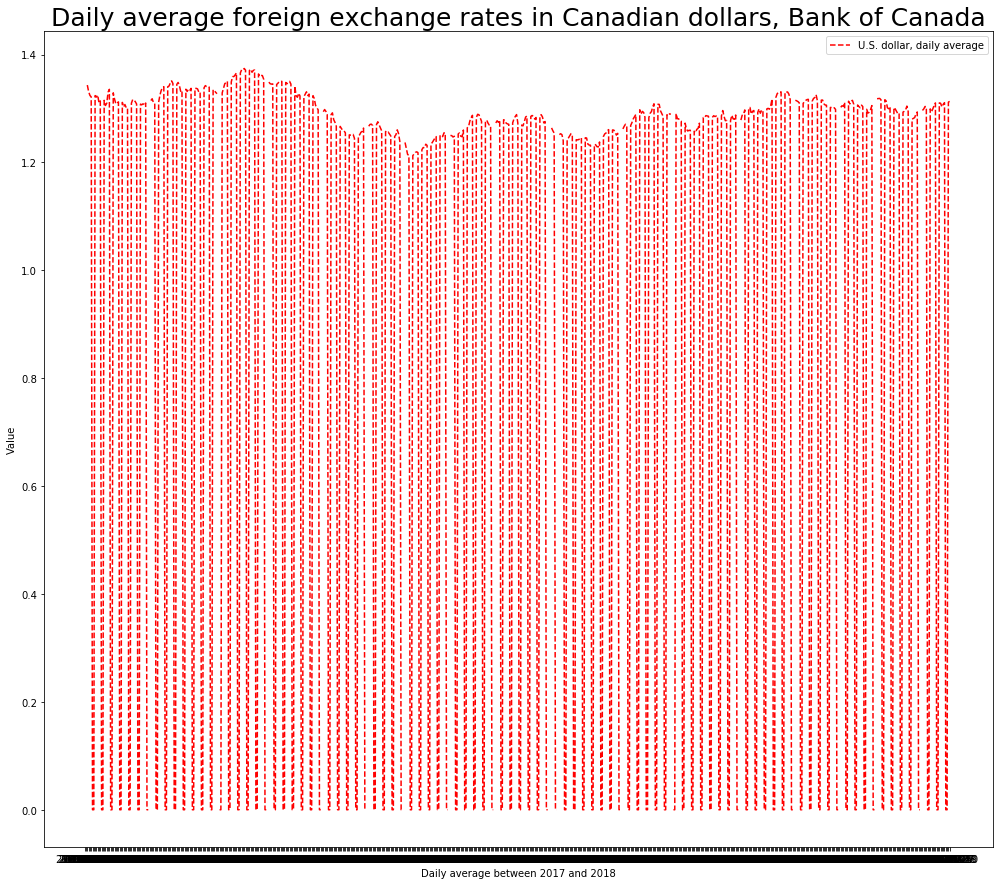

In [45]:
fig = plt.figure(facecolor='w',figsize=(17,15))
ax  = fig.add_subplot(111,facecolor = '#ffffff')

plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
#plt.plot(df_20_USA["REF_DATE"],df_20_USA["VALUE"],'r--',label='U.S. dollar, daily average')
plt.xlabel('Daily average between 2017 and 2018')
plt.ylabel('Value')
plt.title('Daily average foreign exchange rates in Canadian dollars, Bank of Canada',fontsize=25)
legend = ax.legend()

plt.show()

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)